# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [22]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [91]:
## Load the data into a DataFrame
df = pd.read_csv('../data/Iowa_Liquor_sales_sample_10pct.csv')
df_zip_area = pd.read_csv('../data/ia_zip_area.csv')
df_zip = pd.read_csv('../data/ia_zip_city_county.csv')
#df_us = pd.read_csv('../data/US_zip_code_database.csv')

In [92]:
df_zip_area.info()
df_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 4 columns):
ZCTA5CE10    936 non-null object
ALAND10      936 non-null int64
AWATER10     936 non-null int64
area         936 non-null int64
dtypes: int64(3), object(1)
memory usage: 29.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 6 columns):
Unnamed: 0      1064 non-null int64
zip             1064 non-null object
primary_city    1064 non-null object
county          1064 non-null object
state           1064 non-null object
County#         1064 non-null int64
dtypes: int64(2), object(4)
memory usage: 49.9+ KB


In [93]:
df_zip_full = []
df_zip_trunc = []
df_us2 = []
df_us2 = df_us.copy()


df_zip_full = df_zip.merge(df_zip_area, left_on='zip', right_on='ZCTA5CE10', how='left')
df_zip_full['area-sqm'] = df_zip_full['ALAND10'] + df_zip_full['AWATER10']
df_zip_full


,Unnamed: 0,zip,primary_city,county,state,County#,ZCTA5CE10,ALAND10,AWATER10,area,area-sqm
0,0,force_zip_str,CITY,COUNTY,IA,0,NaN,NaN,NaN,NaN,NaN
1,1,50001,ACKWORTH,Warren,IA,91,50001,62132136.0,664520.0,62748472.0,62796656.0
2,2,50002,ADAIR,Guthrie,IA,39,50002,279019969.0,182250.0,279108726.0,279202219.0
3,3,50003,ADEL,Dallas,IA,25,50003,296262168.0,1824123.0,297903455.0,298086291.0
4,4,50005,ALBION,Marshall,IA,64,50005,69351844.0,271729.0,69567928.0,69623573.0
5,5,50006,ALDEN,Hardin,IA,42,50006,317608669.0,136481.0,317499537.0,317745150.0
6,6,50007,ALLEMAN,Polk,IA,77,50007,13782897.0,0.0,13772723.0,13782897.0
7,7,50008,ALLERTON,Wayne,IA,93,50008,219823966.0,799607.0,220453094.0,220623573.0
8,8,50009,ALTOONA,Polk,IA,77,50009,65155566.0,51547.0,65157314.0,65207113.0
9,9,50010,AMES,Story,IA,85,50010,155033818.0,260300.0,155178965.0,155294118.0


In [89]:

df_zip_trunc = df_zip_full[['ZCTA5CE10','area-sqm', 'area']]
df_zip_full = df_zip.merge(df_zip_trunc, left_on='zip', right_on='ZCTA5CE10', how='left')
df_zip_full.drop('Unnamed: 0', axis=1, inplace=True)
#df_zip_full.to_csv('../data/ia_zip_city_county_sqm.csv')
df_zip_full.info()
df_zip_full[(df_zip_full['area-sqm'].isnull())]
df_us2 = df_zip_full.merge(df_us2, left_on='zip', right_on='zip')
df_us2 = df_us2[(df_us2['area-sqm'].isnull()) & (df_us2['type'] != 'PO BOX') ]
df_us2.info()
#df_us[df_us['area-sqm'].isnull()].shape()
df_us2

df_zip_full:       Unnamed: 0            zip     primary_city     county state  County#  \
0              0  force_zip_str             CITY     COUNTY    IA        0   
1              1          50001         ACKWORTH     Warren    IA       91   
2              2          50002            ADAIR    Guthrie    IA       39   
3              3          50003             ADEL     Dallas    IA       25   
4              4          50005           ALBION   Marshall    IA       64   
5              5          50006            ALDEN     Hardin    IA       42   
6              6          50007          ALLEMAN       Polk    IA       77   
7              7          50008         ALLERTON      Wayne    IA       93   
8              8          50009          ALTOONA       Polk    IA       77   
9              9          50010             AMES      Story    IA       85   
10            10          50011             AMES      Story    IA       85   
11            11          50012             AMES   

,zip,primary_city_x,county_x,state_x,County#,ZCTA5CE10,area-sqm,area,type,decommissioned,...,unacceptable_cities,state_y,county_y,timezone,area_codes,world_region,country,latitude,longitude,estimated_population_2013
0,50001,ACKWORTH,Warren,IA,91,NaN,NaN,NaN,STANDARD,0,...,"Milo, Sandyville",IA,Warren County,America/Chicago,NaN,NaN,US,41.36,-93.47,616
1,50002,ADAIR,Guthrie,IA,39,NaN,NaN,NaN,STANDARD,0,...,North Branch,IA,Guthrie County,America/Chicago,641,NaN,US,41.50,-94.64,1282
2,50003,ADEL,Dallas,IA,25,NaN,NaN,NaN,STANDARD,0,...,NaN,IA,Dallas County,America/Chicago,515,NaN,US,41.61,-94.02,6439
3,50005,ALBION,Marshall,IA,64,NaN,NaN,NaN,STANDARD,0,...,Minerva,IA,Marshall County,America/Chicago,641,NaN,US,42.11,-92.98,746
4,50006,ALDEN,Hardin,IA,42,NaN,NaN,NaN,STANDARD,0,...,NaN,IA,Hardin County,America/Chicago,515,NaN,US,42.51,-93.37,1661
5,50007,ALLEMAN,Polk,IA,77,NaN,NaN,NaN,STANDARD,0,...,NaN,IA,Polk County,America/Chicago,515,NaN,US,41.81,-93.61,484
6,50008,ALLERTON,Wayne,IA,93,NaN,NaN,NaN,STANDARD,0,...,Harvard,IA,Wayne County,America/Chicago,641,NaN,US,40.70,-93.36,768
7,50009,ALTOONA,Polk,IA,77,NaN,NaN,NaN,STANDARD,0,...,"Adventureland Estates, Ivy",IA,Polk County,America/Chicago,515,NaN,US,41.65,-93.47,15263
8,50010,AMES,Story,IA,85,NaN,NaN,NaN,STANDARD,0,...,NaN,IA,Story County,America/Chicago,515,NaN,US,42.02,-93.62,22907
9,50011,AMES,Story,IA,85,NaN,NaN,NaN,UNIQUE,0,...,Iowa State University,IA,Story County,America/Chicago,515,NaN,US,42.02,-93.62,75


In [188]:
## Transform the dates column
df["Date"] = pd.to_datetime(df["Date"], format='%m/%d/%Y')

Columns that we would be interested in:
- Date
- Store number
- City
- Zip code
- County
- Category
- Category name
- Vendor number
- Item number
- Item description
- State bottle cost
- State bottle retail
- Bottles sold
- Sales (dollars)
- Volumes (liters)

To ensure accuracy, we are importing a list of Iowa zip codes, cities, counties and county numbers.
- There are some zip codes which cross cities, but we just picked up the first city.

In [189]:
location_data = pd.read_csv('/Users/stel/joce/data_science/project-3-datasets/ia_zip_city_county.csv', skiprows=1)

In [190]:
location_data.head()

,0,force_zip_str,CITY,COUNTY,IA,0.1
0,1,50001,ACKWORTH,Warren,IA,91
1,2,50002,ADAIR,Guthrie,IA,39
2,3,50003,ADEL,Dallas,IA,25
3,4,50005,ALBION,Marshall,IA,64
4,5,50006,ALDEN,Hardin,IA,42


In [191]:
location_data.columns = ['number', 'Zip Code', 'City', 'County', 'State','County Number']

We will run a check on zip codes before joining the 2 tables

In [192]:
liquor_zips = df['Zip Code'].drop_duplicates().tolist()
ref_zips = location_data['Zip Code'].astype(str).tolist()
z = [x for x in liquor_zips if x not in ref_zips]
print z

['52303', '712-2', '52087', '52084', '56201', '50300']


In [193]:
for i in z:
    print df[['Zip Code', 'City', 'County', 'County Number']][df['Zip Code'] == i].drop_duplicates()
    city = df['City'][df['Zip Code'] == i].drop_duplicates().iloc[0].title()
    print city
    try:
        print location_data[location_data['City']==city].drop_duplicates()
    except:
        print i, 'not in Iowa'
    print

   Zip Code          City County  County Number
78    52303  CEDAR RAPIDS   Linn           57.0
Cedar Rapids
Empty DataFrame
Columns: [number, Zip Code, City, County, State, County Number]
Index: []

     Zip Code    City    County  County Number
114     712-2  DUNLAP  Harrison           43.0
8186    712-2  DUNLAP       NaN            NaN
Dunlap
Empty DataFrame
Columns: [number, Zip Code, City, County, State, County Number]
Index: []

    Zip Code        City    County  County Number
267    52087  MANCHESTER  Delaware           28.0
Manchester
Empty DataFrame
Columns: [number, Zip Code, City, County, State, County Number]
Index: []

    Zip Code       City County  County Number
464    52084  DAVENPORT  Scott           82.0
Davenport
Empty DataFrame
Columns: [number, Zip Code, City, County, State, County Number]
Index: []

     Zip Code        City      County  County Number
1871    56201  BURLINGTON  Des Moines           29.0
Burlington
Empty DataFrame
Columns: [number, Zip Code, City,

Based on the above, we get a vague idea of what the zips are supposed to be

In [194]:
corrected_zips = ['52403','51529', '52057','52804','52601','50301']
for i in range(len(z)):
    df.ix[df['Zip Code']==z[i], 'Zip Code']=corrected_zips[i]

In [195]:
# Run the test again
liquor_zips = df['Zip Code'].drop_duplicates().tolist()
ref_zips = location_data['Zip Code'].astype(str).tolist()
z = [x for x in liquor_zips if x not in ref_zips]
print z

[]


In [196]:
df['Zip Code'] = df['Zip Code'].astype(int)

Now we merge our location data to our liquor sales

In [200]:
df2 = df.copy()
df2.drop(['County Number', 'City', 'County'], axis=1, inplace=True)

In [201]:
df2 = df2.merge(location_data, how='left', on='Zip Code')
df2.drop(['number','State'], axis=1, inplace=True)

In [202]:
df2.head()

,Date,Store Number,Zip Code,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),City,County,County Number
0,2015-11-04,3717,50674,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38,SUMNER,Bremer,9
1,2016-03-02,2614,52807,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40,DAVENPORT,Scott,82
2,2016-02-11,2106,50613,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34,CEDAR FALLS,Black Hawk,7
3,2016-02-03,2501,50010,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77,AMES,Story,85
4,2015-08-18,3654,50421,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55,BELMOND,Wright,99


In [203]:
df2.dtypes

Date                     datetime64[ns]
Store Number                      int64
Zip Code                          int64
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
City                             object
County                           object
County Number                     int64
dtype: object

In [204]:
# Write a function that cross references related columns and fills the data in where it's missing
def fill_missing(related_cols, column, dataframe):
    related_cols.remove(column)
    reference = dataframe[related_cols][dataframe[column].isnull()].drop_duplicates()
    for j in range(len(related_cols)):
        col_1 = reference[related_cols[j]]
        for i in col_1:
            try:
                x = dataframe[column][(dataframe[related_cols[j]]==i) & (dataframe[column].notnull())].drop_duplicates()
                if len(x) < 2:
                    #print 'Missing: {}, Reference: {}, Ref_value: {}, filler: {}'.\
                    #format(column, related_cols[j], i, x.iloc[0])
                    value = x.iloc[0]
                    dataframe.ix[(dataframe[related_cols[j]]==i) & (dataframe[column].isnull()), column] = value
            except:
                pass

In [205]:
fill_missing(['Category', 'Category Name'], 'Category Name', df2)
fill_missing(['Category', 'Category Name'], 'Category', df2)

fill_missing(['Item Number', 'Item Description'], 'Item Description', df2)
fill_missing(['Item Number', 'Item Description'], 'Item Number', df2)

In [206]:
# Convert all dollar columns to floats
df2['State Bottle Cost'] = df2['State Bottle Cost'].map(lambda x: x.strip('$')).astype(float)
df2['State Bottle Retail'] = df2['State Bottle Retail'].map(lambda x: x.strip('$')).astype(float)
df2['Sale (Dollars)'] = df2['Sale (Dollars)'].map(lambda x: x.strip('$')).astype(float)

In [207]:
# Extract Month and Year
df2['Month'] = df2['Date'].map(lambda x: x.month)
df2['Year'] = df2['Date'].map(lambda x: x.year)


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

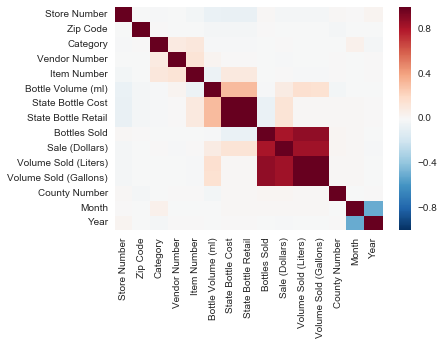

In [208]:
sns.heatmap(df2.corr());

Based on the above heat map, we can see that:
- bottle volume, state bottle cost, and state bottle retail are slightly correlated
- bottles sold, sales revenue, and volumn sold are highly correlated
    - our target variable is sales revenue, however since it is a direct function of bottles sold and price, we cannot use bottles sold to predict sales revenue (since it's a direct function, if you had one, you would have the other and there would be no need for prediction)

Our hypothesis is that the demographics of an area would affect the liquor sales there.  
Ideally, we would have wanted to combine our liquor sales data with the demographics data of the corresponding year.  
We were unable to do that and have combined it with the demographics data that we were able to find.  
- This may compromise our model and we should seek to improve it if possible

In [209]:
demo_df = pd.read_csv('/Users/stel/joce/data_science/project-3-datasets/IowaZIPdemos.csv')

In [210]:
demo_df.dropna(inplace=True)
demo_df['Area'] = demo_df['Area'].astype(int)

In [211]:
demo_cols = demo_df.columns.values.tolist()
object_cols = [i for i in demo_cols if demo_df[i].dtype == 'O']

In [212]:
def rem_symbols(x):
    for i in [',', '%', '$', '-']:
        x = x.replace(i, '')
    try:
        return float(x)
    except:
        print x
    
for i in object_cols:
    demo_df[i] = demo_df[i].map(rem_symbols)

In [213]:
df3 = df2.copy()[df2['Year']==2015]
df4 = pd.pivot_table(df3, index=['Zip Code'], \
               values=['Bottles Sold', 'Volume Sold (Liters)', 'Sale (Dollars)'],\
                     aggfunc=[np.median, sum]).reset_index()

In [214]:
df4.columns

MultiIndex(levels=[[u'median', u'sum', u'Zip Code'], [u'Bottles Sold', u'Sale (Dollars)', u'Volume Sold (Liters)', u'']],
           labels=[[2, 0, 0, 0, 1, 1, 1], [3, 0, 1, 2, 0, 1, 2]])

In [215]:
df2 = df2.merge(df4, how='left',on='Zip Code')

In [219]:
df3_gb = df2[['Zip Code','Store Number']].drop_duplicates()
df3_gb = df3_gb.rename(columns={'Store Number': 'StoreCount'})
df3_gb = df3_gb.groupby(['Zip Code']).count().reset_index()

In [221]:
df2 = df2.merge(df3_gb, how='left', on='Zip Code')

In [222]:
df2.head()

,Date,Store Number,Zip Code,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,...,County Number,Month,Year,median bottles sold,median sales,median volume sold,total bottles sold,total sales,total volume sold,StoreCount
0,2015-11-04,3717,50674,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,...,9,11,2015,2.0,27.00,1.75,632.0,9022.86,685.53,1
1,2016-03-02,2614,52807,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,...,82,3,2016,6.0,99.00,9.00,39971.0,596760.04,39658.85,9
2,2016-02-11,2106,50613,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,...,7,2,2016,5.0,64.80,4.50,38503.0,516664.79,36408.33,16
3,2016-02-03,2501,50010,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,...,85,2,2016,6.0,70.86,4.50,53617.0,772044.25,52520.63,21
4,2015-08-18,3654,50421,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,...,99,8,2015,6.0,82.26,9.00,2129.0,27212.63,2448.50,3


In [223]:
df2.columns = ['Date', 'Store Number', 'Zip Code', 'Category', 'Category Name',\
       'Vendor Number', 'Item Number', 'Item Description',\
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',\
       'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)',\
       'Volume Sold (Gallons)', 'City', 'County', 'County Number', 'Month',\
       'Year', 'median bottles sold', 'median sales',\
       'median volume sold', 'total bottles sold', 'total sales', 'total volume sold', 'Store Count']

In [224]:
df5 = df2[['Store Number', 'Zip Code', 'City', 'County', 'County Number', 'Category',\
           'Vendor Number', 'Item Number', 'Bottle Volume (ml)',\
           'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)' ,\
          'median bottles sold', 'median sales',\
       'median volume sold', 'total bottles sold', 'total sales', 'total volume sold', 'Store Count']]

In [225]:
df5 = df5.merge(demo_df, how='left', left_on='Zip Code', right_on='Area')

In [226]:
df6 = df5.copy()

In [227]:
sales_median = df5['total sales'].median()
sales_std = df5['total sales'].std()

In [228]:
# Remove outliers in sales that are 3 std away from the median
df5 = df5[abs(df5['total sales'] - sales_median) <= 3*sales_std]

In [229]:
df5['total sales'].describe()

count    263122.000000
mean     270362.112885
std      245802.812541
min          90.000000
25%       76787.320000
50%      191106.040000
75%      396654.500000
max      981966.840000
Name: total sales, dtype: float64

In [230]:
df5['median sales'].describe()

count    263122.000000
mean         72.046231
std          21.971069
min          15.105000
25%          61.200000
50%          72.000000
75%          86.400000
max         616.980000
Name: median sales, dtype: float64

In [241]:
features = df5.columns.values.tolist()
print features

['Store Number', 'Zip Code', 'City', 'County', 'County Number', 'Category', 'Vendor Number', 'Item Number', 'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)', 'median bottles sold', 'median sales', 'median volume sold', 'total bottles sold', 'total sales', 'total volume sold', 'Store Count', 'Area', 'Total Pop', 'Median HH Inc', 'Per Capita Inc', 'White', 'Afr Amer', 'Native Amer', 'Asian Amer', 'Pac Islander', 'Other', 'Bi- Multi-Racial', 'Hispanic or Latino', 'Med Age', '<5 years', '5-17 yrs', '18-20 yrs', '21-24 yrs', '25-34 yrs', '35-44 yrs', '45-54 yrs', '55-59 yrs', '60-64 yrs', '65-74 yrs', '78-84 yrs', '85+ yrs', '% P16+ in labor force', 'Total # Homes Owned', 'Med. Home Value', 'Tot Housing units', 'Owner occupied housing units', 'Renter occupied housing units', 'households', 'Family households', 'Married-couple family households', 'Single mother households', 'Nonfamily households', 'Single Occupancy', 'Avg HH Size', 'Avg Family Size', 'Pop Bel

In [242]:
drop_features = ['Store Number', 'Zip Code', 'City', 'County', 'County Number',\
                 'Category', 'Vendor Number', 'Item Number', 'Bottle Volume (ml)',\
                 'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)',\
                 'median bottles sold', 'median sales', 'median volume sold', 'total bottles sold',\
                 'total sales', 'total volume sold', 'Area', 'Store Count']
for i in drop_features:
    features.remove(i)


In [243]:
df6 = df5.copy().dropna()
X = df6[features]

In [244]:
y = df6['total sales']
ridge = linear_model.RidgeCV(cv=5)
model = ridge.fit(X,y)
print model.score(X,y)
print model.alpha_

0.863178710177
0.1


In [245]:
x = pd.DataFrame([features, model.coef_.tolist()], index=['feature', 'coef']).T
x['coef'] = x['coef'].astype(float)
x = x.sort_values(by='coef', ascending=False)
x

,feature,coef
39,% P25+ HS Grad,2930.273179
35,Single Occupancy,703.995206
21,65-74 yrs,516.821560
12,<5 years,486.929733
9,Bi- Multi-Racial,353.003054
7,Pac Islander,349.893822
32,Married-couple family households,344.221515
15,21-24 yrs,334.289533
17,35-44 yrs,204.918265
30,households,160.309519


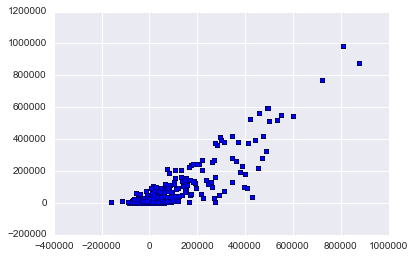

In [246]:
predicted = model.predict(X)

plt.scatter(predicted, y)

In [247]:
y2 = df6['median sales']
ridge = linear_model.RidgeCV(cv=5)
model2 = ridge.fit(X,y2)
print model2.score(X,y2)
print model2.alpha_

0.381897506188
0.1


In [248]:
x2 = pd.DataFrame([features, model.coef_.tolist()], index=['feature', 'coef']).T
x2['coef'] = x2['coef'].astype(float)
x2 = x2.sort_values(by='coef', ascending=False)
x2

,feature,coef
39,% P25+ HS Grad,2930.273179
35,Single Occupancy,703.995206
21,65-74 yrs,516.821560
12,<5 years,486.929733
9,Bi- Multi-Racial,353.003054
7,Pac Islander,349.893822
32,Married-couple family households,344.221515
15,21-24 yrs,334.289533
17,35-44 yrs,204.918265
30,households,160.309519


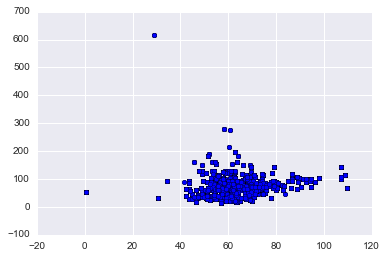

In [249]:
predicted2 = model2.predict(X)

plt.scatter(predicted2, y2)

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [ ]:
from sklearn import linear_model


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.